In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [5]:
# Read the CSV and get the top 10 rows
try:
    df = pd.read_csv("D:\\Python\\archive\\CarPrice_Assignmen.csv")
except FileNotFoundError as error:
    print(error)
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [72]:
# check for null values it has 788 rows with null values for all columns
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [73]:
df.duplicated().any()

False

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [75]:
df.shape

(205, 26)

In [76]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [77]:

for col in df.columns:
    print(col, ":",df[col].nunique()) # to display count of unique values
    print(df[col].value_counts().nlargest(5)) # to display the top 5 most frequently occurring values in a specific column
    print('\n' + '-' * 20 + '\n')

car_ID : 205
car_ID
1      1
142    1
132    1
133    1
134    1
Name: count, dtype: int64

--------------------

symboling : 6
symboling
 0    67
 1    54
 2    32
 3    27
-1    22
Name: count, dtype: int64

--------------------

CarName : 147
CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
Name: count, dtype: int64

--------------------

fueltype : 2
fueltype
gas       185
diesel     20
Name: count, dtype: int64

--------------------

aspiration : 2
aspiration
std      168
turbo     37
Name: count, dtype: int64

--------------------

doornumber : 2
doornumber
four    115
two      90
Name: count, dtype: int64

--------------------

carbody : 5
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

--------------------

drivewheel : 3
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

--------------------

e

In [5]:
# Make all the strings in the same format
string_columns=list(df.dtypes[df.dtypes=='object'].index)
for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','_')
    df[col]=df[col].str.lower().str.replace('-','_')

<Axes: xlabel='price', ylabel='Count'>

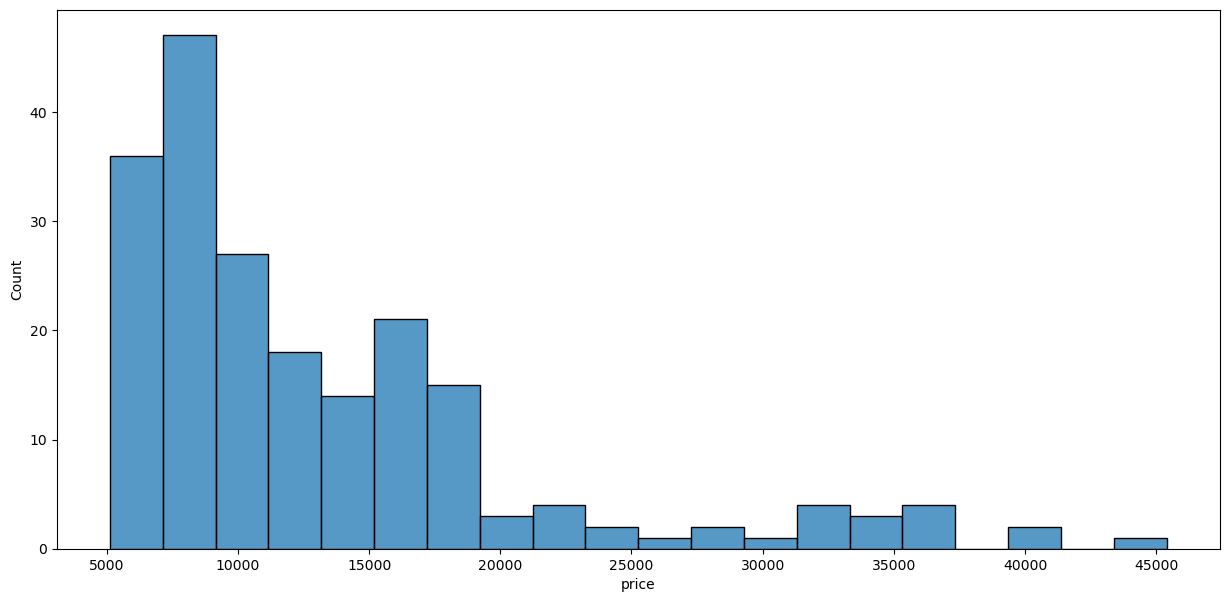

In [79]:
plt.figure(figsize=(15,7))
sns.histplot(df.price,bins=20)
# as seen it is right skewed

In [80]:
# Check catogerical columns
string_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

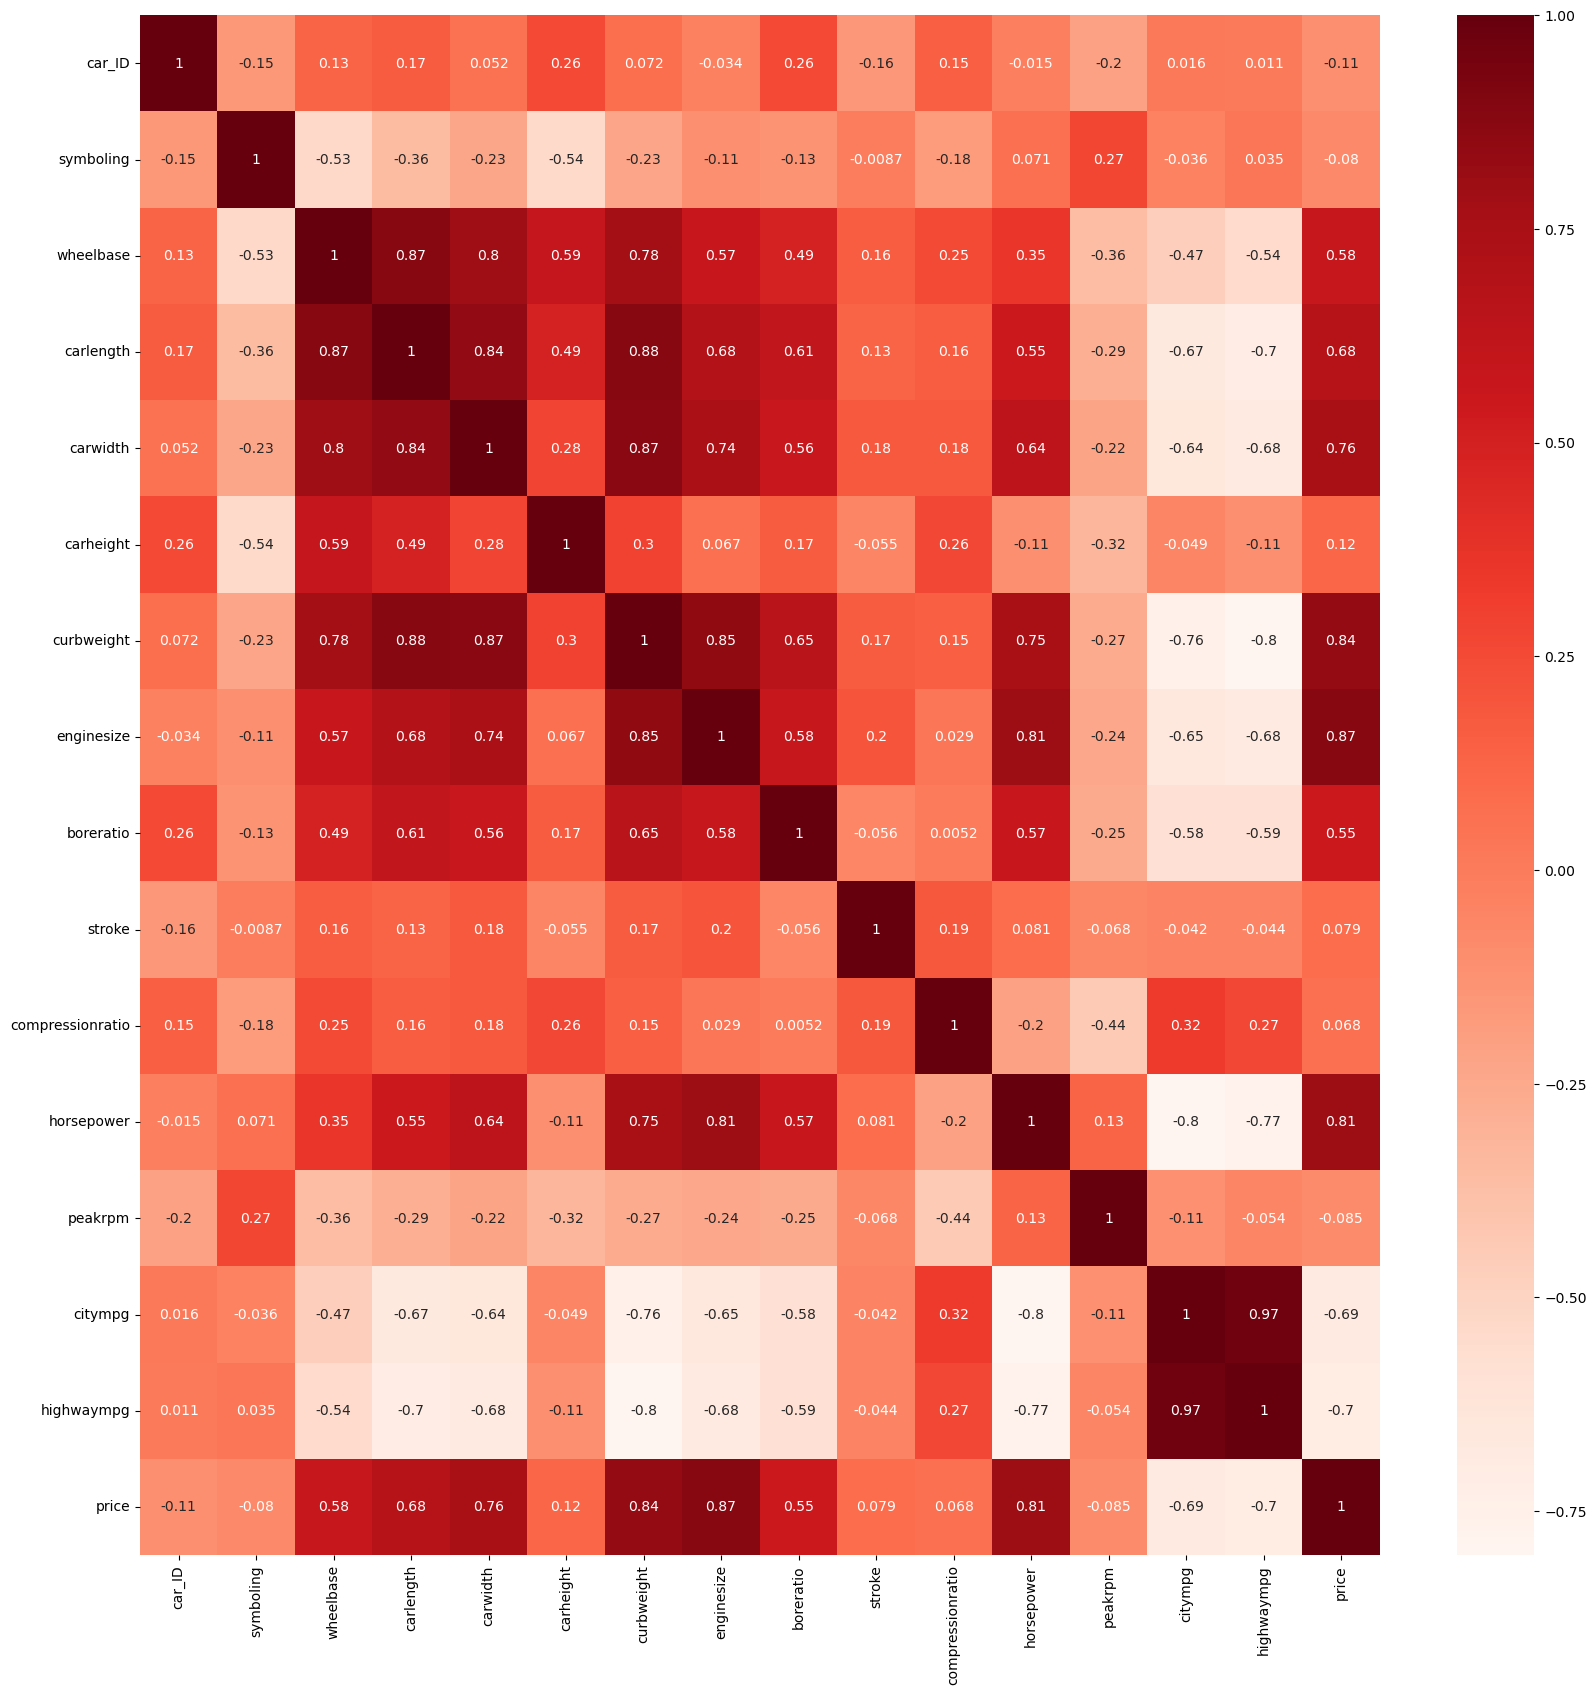

In [81]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
# Create a heatmap for the correlation matrix of numeric columns
plt.figure(figsize=(20,20))
sns.heatmap(numeric_columns.corr(method='pearson'), cmap='Reds', annot=True)
plt.show()

#From this map, there are some features which price depends on by large percent such as 
#(carwidth, curbweight, enginesize and horsepower) and gradually less as (carlength ,wheel base and boreratio)

In [82]:
# What's the average price of cars in dataset?
df.CarName.value_counts()
average_price_by_company = df.groupby('CarName')['price'].mean()
print(average_price_by_company)

#1) alfa_romero_giulia has a greater price and its version also (quadrifoglio-stelvio)

# 2) vm_rabbit has lower price in cars

CarName
alfa_romero_giulia          13495.0
alfa_romero_quadrifoglio    16500.0
alfa_romero_stelvio         16500.0
audi_100_ls                 13950.0
audi_100ls                  17580.0
                             ...   
volvo_246                   22470.0
volvo_264gl                 20522.5
volvo_diesel                18950.0
vw_dasher                   11595.0
vw_rabbit                    9980.0
Name: price, Length: 147, dtype: float64


In [83]:
#Relation between car weight and price ?

#A car’s weight is an important factor in how much fuel it will consume. 
#The heavier the vehicle, the more energy it needs to get moving. 
#Light vehicles are getting lighter. So, there's an affect also on price.

df.groupby('curbweight')['price'].mean()

curbweight
1488     5151.00
1713     6479.00
1819     6855.00
1837     5399.00
1874     7605.75
          ...   
3750    28248.00
3770    31600.00
3900    40960.00
3950    36000.00
4066    33900.00
Name: price, Length: 171, dtype: float64

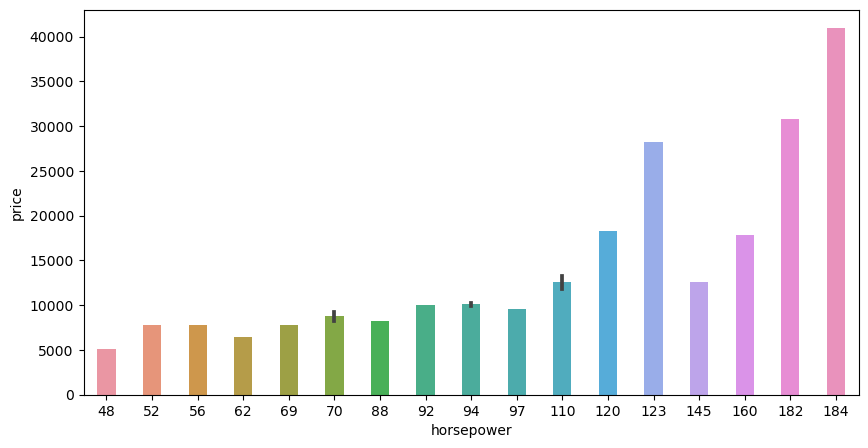

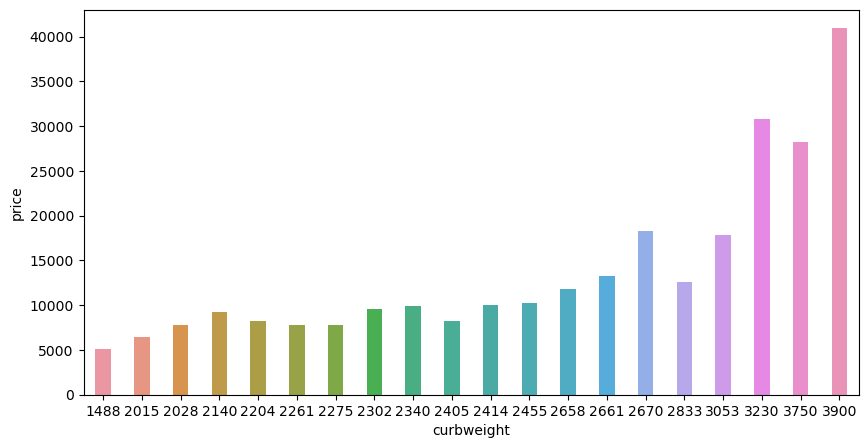

In [84]:
fig = plt.figure(figsize=(10, 5))
sample_size = 20  # Adjust the sample size based on your preference
sampled_data = df.sample(n=sample_size, random_state=42)  # Set a random_state for reproducibility
sns.barplot(x=sampled_data["horsepower"], y=sampled_data["price"], width=0.4)
plt.show()

fig = plt.figure(figsize=(10, 5))
sample_size = 20  # Adjust the sample size based on your preference
sampled_data = df.sample(n=sample_size, random_state=42)  # Set a random_state for reproducibility
sns.barplot(x=sampled_data["curbweight"], y=sampled_data["price"], width=0.4)
plt.show()


In [85]:
# compare the average price for cars which horse power greater /less 100 hp?

print(f"The average price for cars which horse power greater than 100 is {df[df['horsepower']>=100]['price'].mean()}")
print(f"The average price for cars which horse power less than 100 is {df[df['horsepower']<=100]['price'].mean()}")

#The more horsepower a car produces,the better its acceleration, which is a strong factor in its overall performance. 
#So, we see that cars which have a horse power than 100 its price average increased (18632.25) 
#and its horse power less than 100 its price average almost (8766.67)


The average price for cars which horse power greater than 100 is 18632.251776595742
The average price for cars which horse power less than 100 is 8766.67256637168


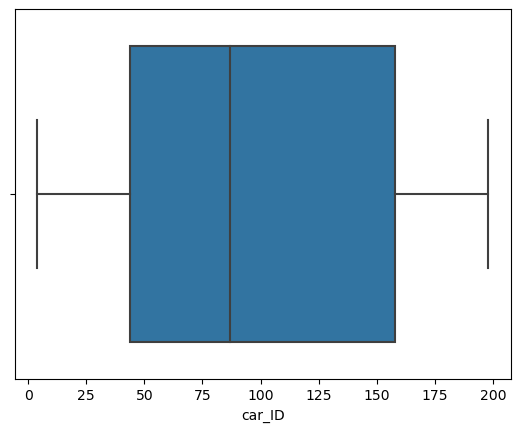

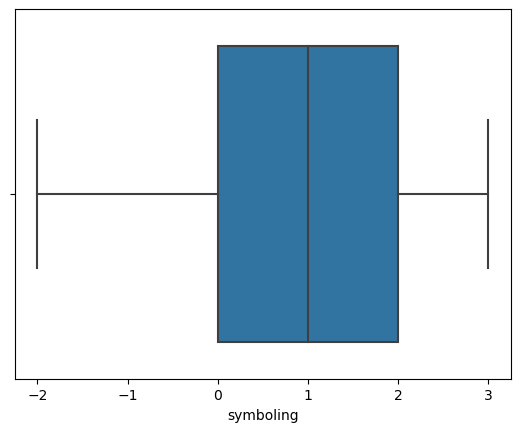

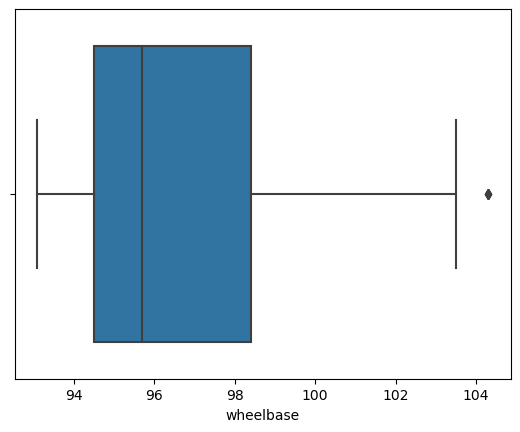

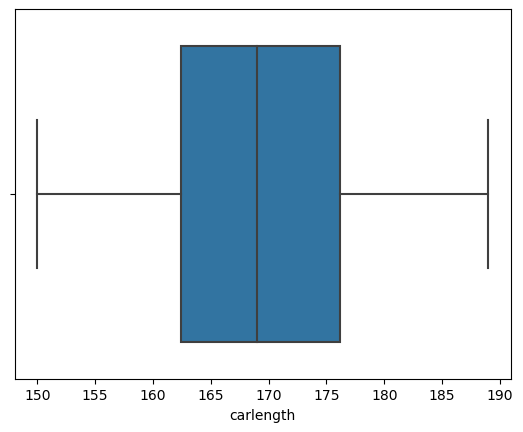

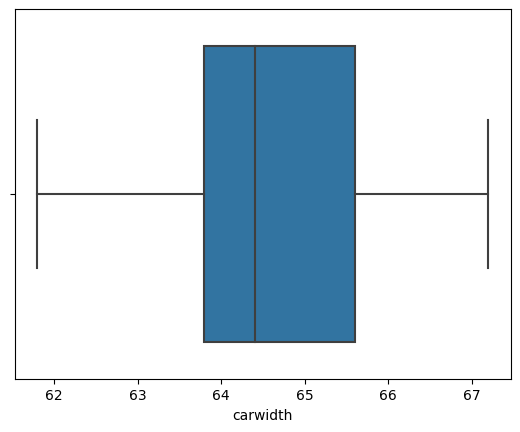

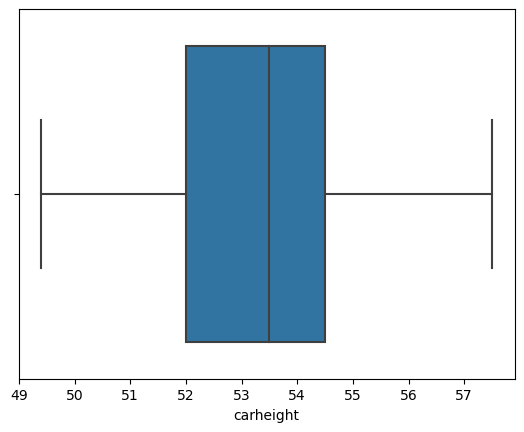

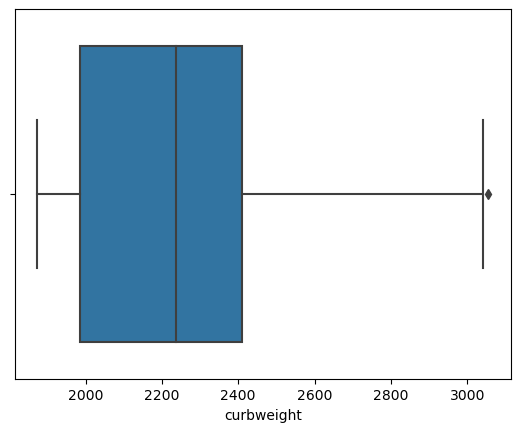

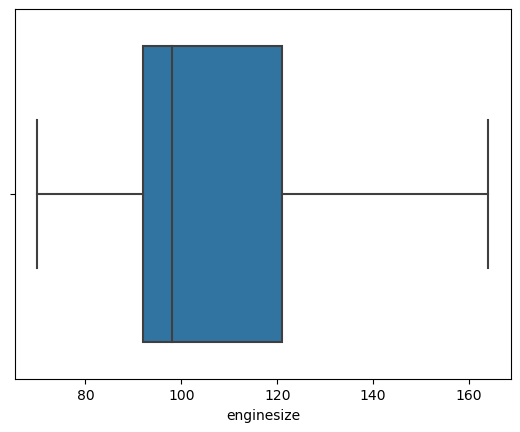

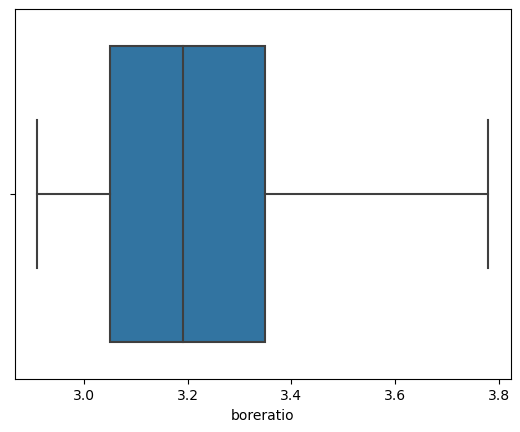

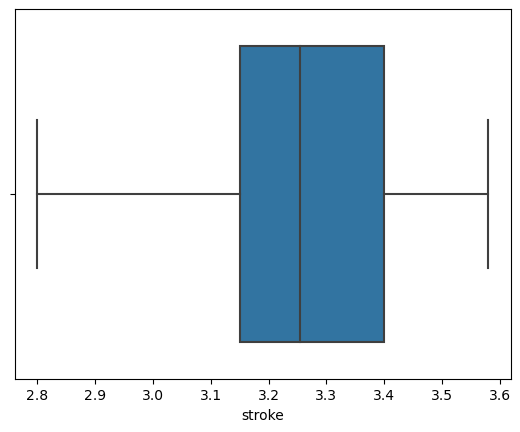

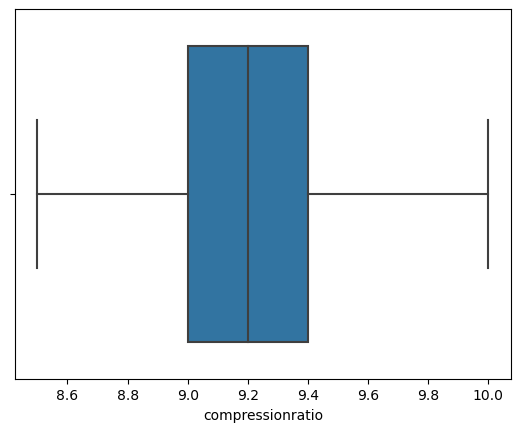

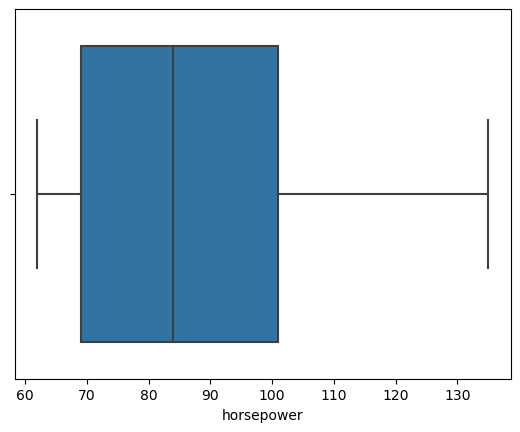

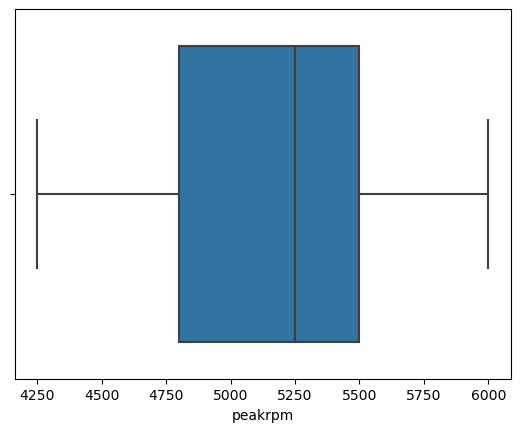

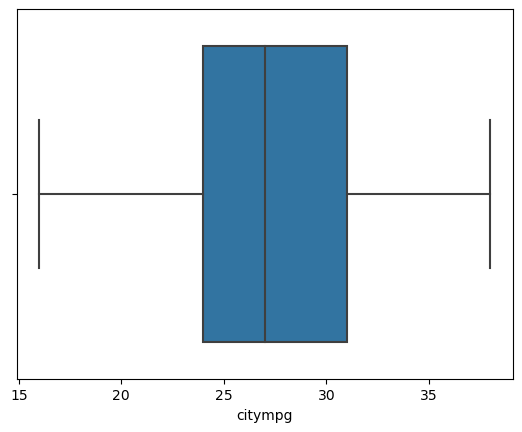

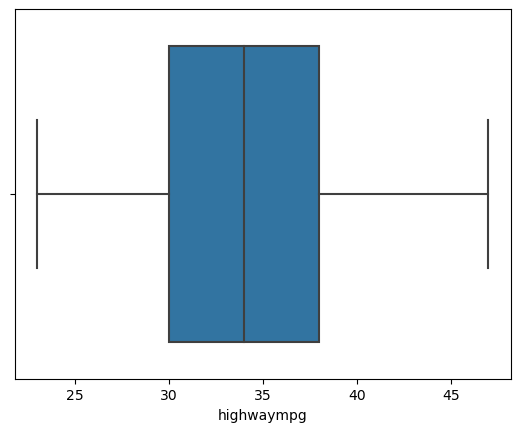

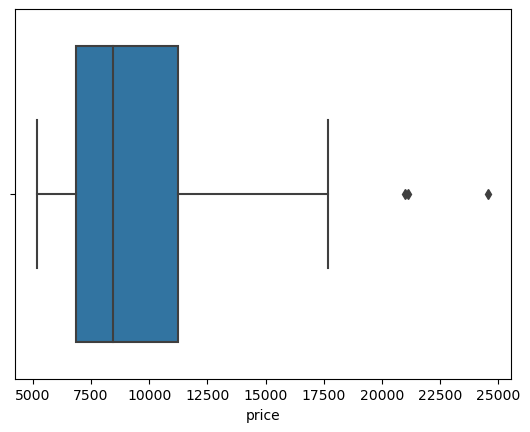

In [6]:
def threshold_outliers(dataframe, col_name):
    Q1 = dataframe[col_name].quantile(0.25)
    Q3 = dataframe[col_name].quantile(0.75)
    IQR = Q3 - Q1
    Low_limit = Q1 - 1.5 * IQR
    Upp_limit = Q3 + 1.5 * IQR
    return Low_limit, Upp_limit 

def check_outlier(dataframe, col_name):
    Low_limit, Upp_limit = threshold_outliers(dataframe, col_name)
    return dataframe[(dataframe[col_name] > Upp_limit) | (dataframe[col_name] < Low_limit)].any().any()

def removeOutliers(dataframe, col):
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe.drop(dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)].index, inplace=True)
    
def showBoxPlot(df,col):
    sns.boxplot(df, x = col)
    plt.show()
i = 1
# I am trying to remove the outliers for 3 times because even though I removed for the first time It is not removing much outliers
# so I noticed if I removed the outliers for 3 times there is an decrease in outliers as well as in increase in R score.

# I removed some of the outliers of others which are not considered for the regression analysis
while(i != 4):
    for col in df:
        if(df[col].dtype != 'object' and col != 'price'):
            val = check_outlier(df,col)
            removeOutliers(df, col)
    i+=1
    
for col in df:
    if(df[col].dtype != 'object'):
        showBoxPlot(df,col)
        

In [7]:
from sklearn.preprocessing import LabelEncoder
# Converting the categorical type to Numerical
# So for fuel type it is gas and diesel so It will 1 and 0 so I considering this will effect in price because for gas or petrol 
# price will be higher and for diesel price will be lower
# So similarly I am considering few of the categorical columns which will effect in price
fueltype_le=LabelEncoder()
df['fueltype']= fueltype_le.fit_transform(df.fueltype)
enginetype_le=LabelEncoder()
df['enginetype']=enginetype_le.fit_transform(df.enginetype) # generate a random values and assign each categorical value
carbody_le=LabelEncoder()
df['carbody']=carbody_le.fit_transform(df.carbody)
cylindernumber_le=LabelEncoder()
df['cylindernumber']=cylindernumber_le.fit_transform(df.cylindernumber)
mapping = {'four': 4, 'two': 2}
df['doornumber'] = df['doornumber'].map(mapping)
# Since door number contains null values i am replacing it to mean after converting from categorical to numerical
df['doornumber'].fillna(df['doornumber'].mean(), inplace=True)
df['cylindernumber'].fillna(df['cylindernumber'].mean(), inplace=True)

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


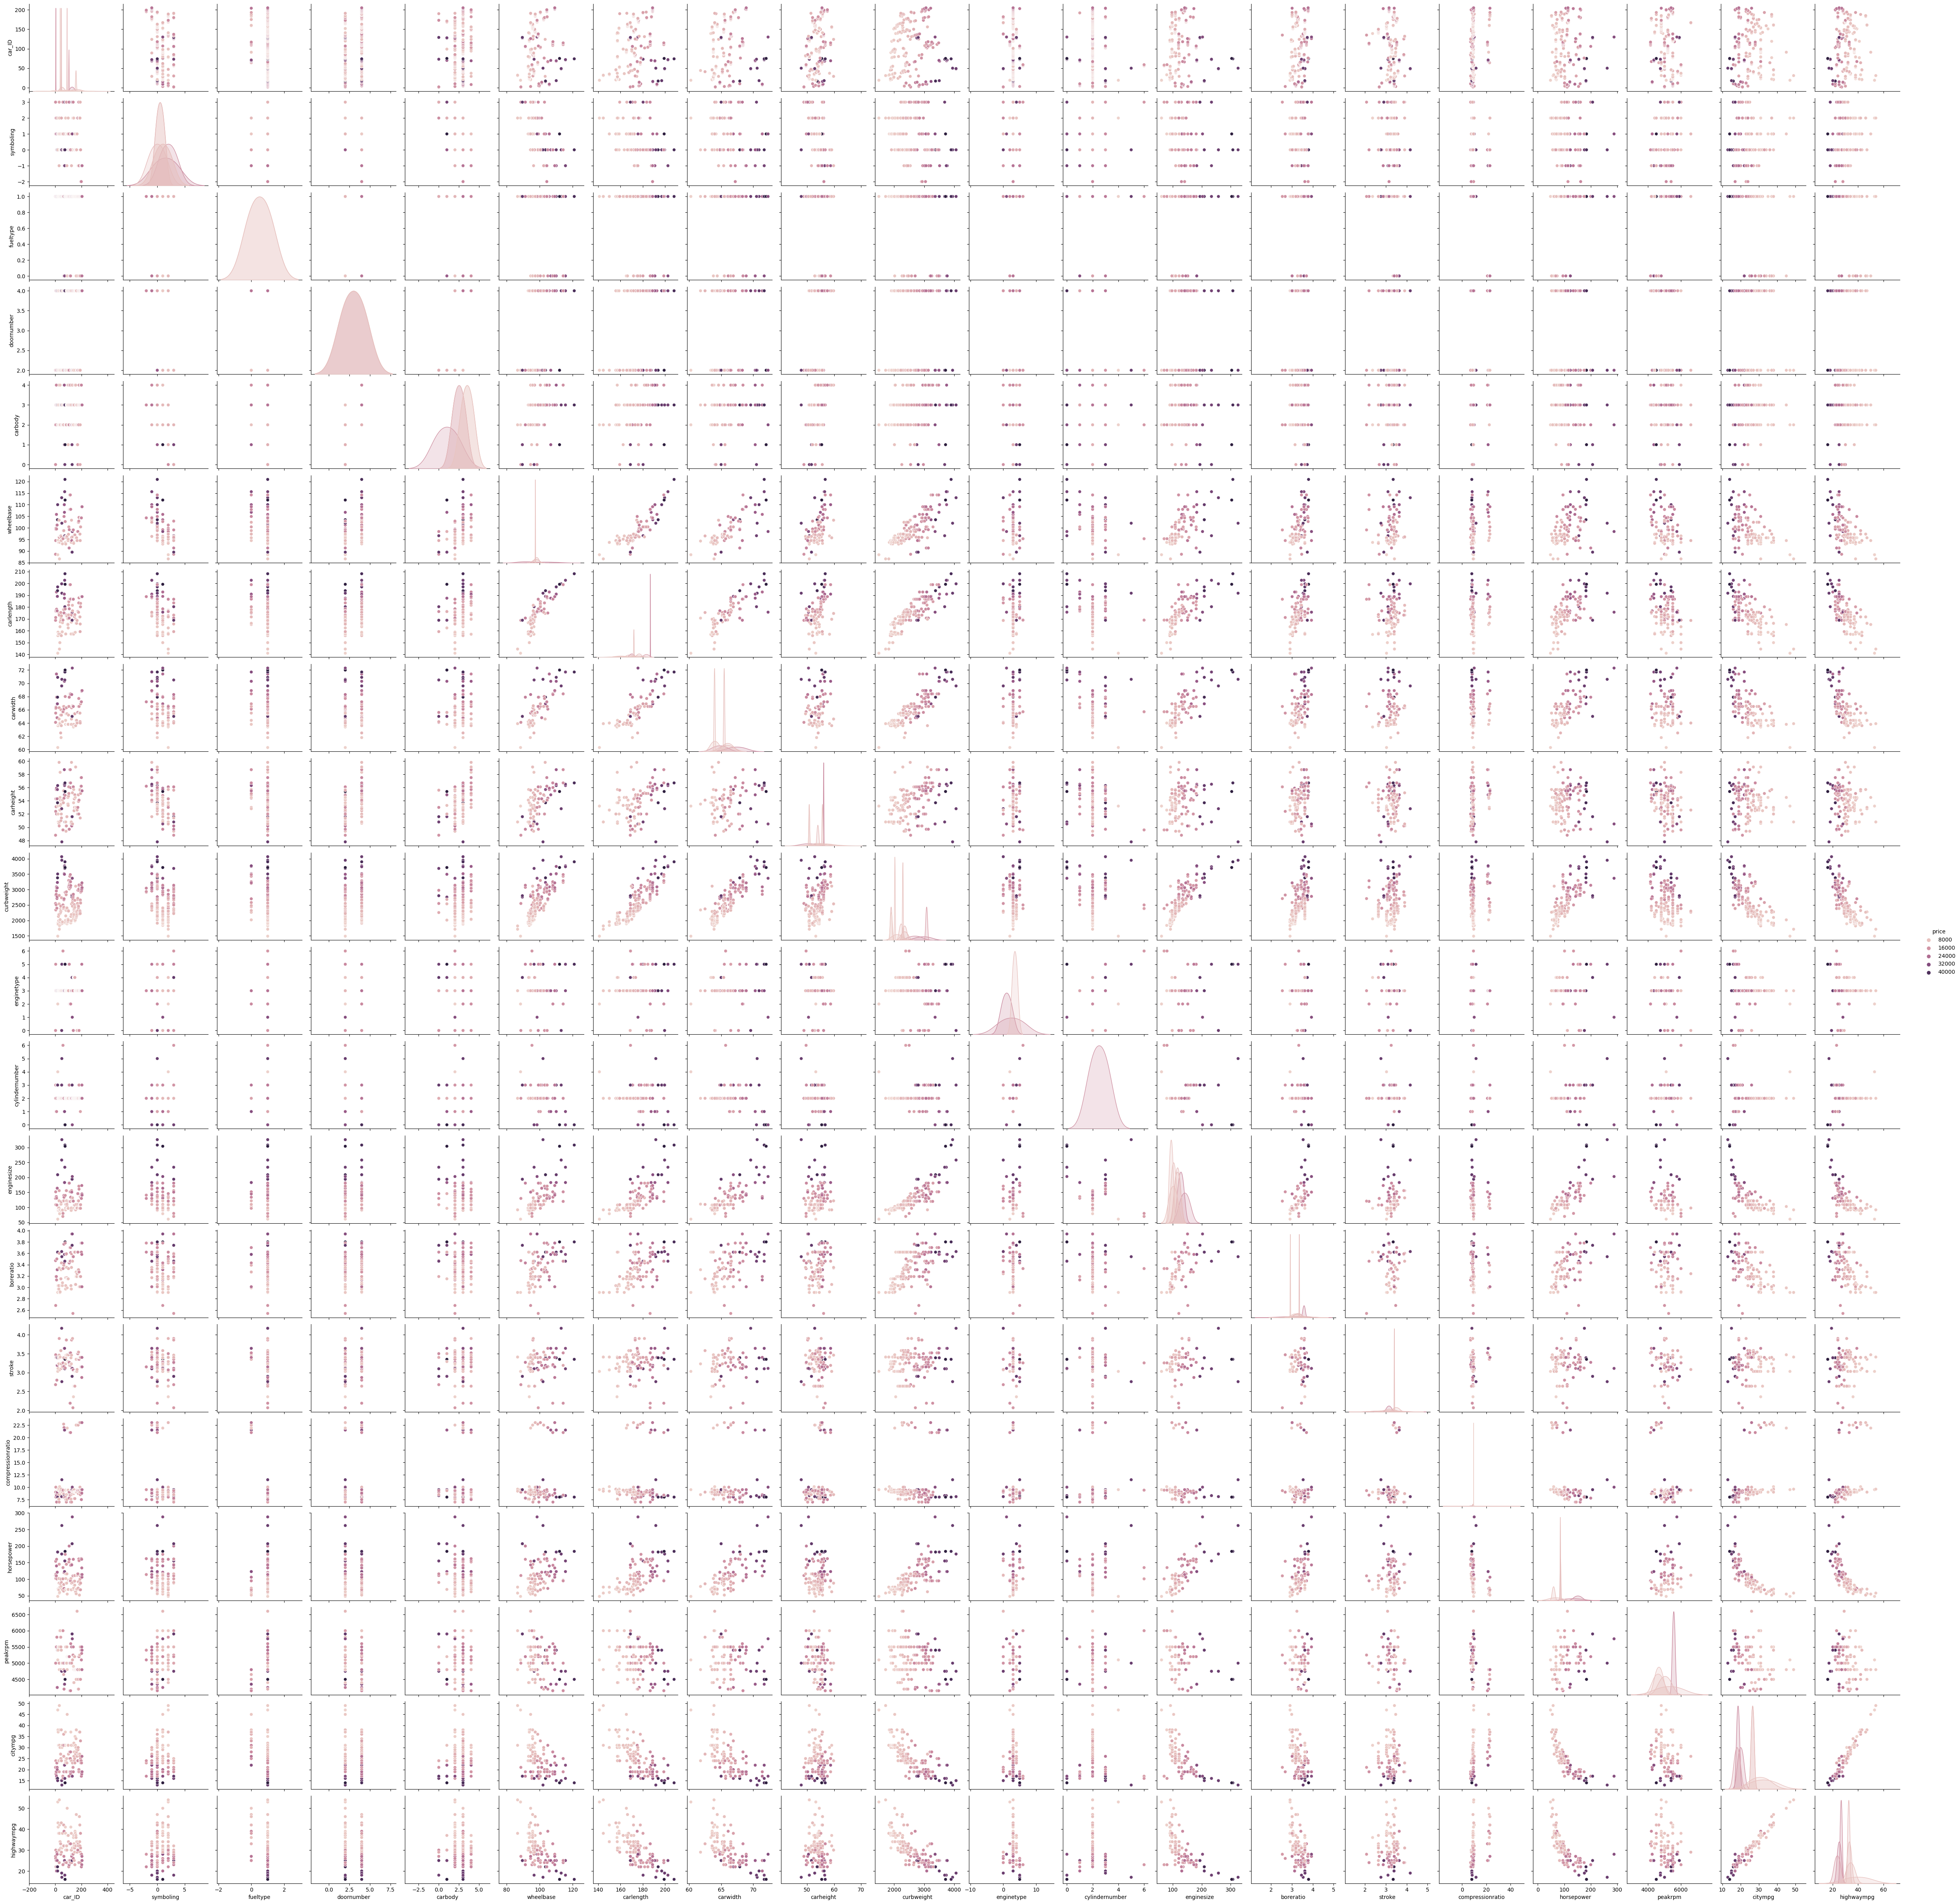

In [59]:
sns.pairplot(df, hue = "price")

In [88]:
import pandas as pd
import sqlite3
try: 
  conn = sqlite3.connect("Company.db")
  cursor = conn.cursor()
  df.to_sql('Employee', conn, if_exists = 'replace', index = False)
  print("Success")
except sqlite3.Error as error:
  print("Error", error)

finally:
  if conn:
    conn.close()
    print("closed")

Success
closed


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

class MyLinearRegression:
    def __init__(self, df, target_column, test_size=0.4, random_state=101):
        self.df = df
        self.target_column = target_column
        self.test_size = test_size
        self.random_state = random_state

    def prepare_data(self):
        x=self.df[["carwidth","curbweight","enginesize","horsepower","carlength","wheelbase","boreratio",
                   "fueltype","enginetype","carbody",
            "doornumber","cylindernumber"]]
        print(x)
        y=self.df['price']
        print(y)
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            x, y, test_size=self.test_size, random_state=self.random_state
        )

    def train_model(self):
        self.lr_model = LinearRegression()
        self.lr_model.fit(self.x_train, self.y_train)

    def predict(self):
        self.lr_pred = self.lr_model.predict(self.x_test)

    def evaluate(self):
        r2 = self.lr_model.score(self.x_train,self.y_train)*100
        mae = mean_absolute_error(self.y_test, self.lr_pred)
        mse = mean_squared_error(self.y_test, self.lr_pred)
        rmse = np.sqrt(mse)

        print("R-squared score:", r2)
        print("Mean Absolute Error (MAE):", mae)
        print("Mean Squared Error (MSE):", mse)
        print("Root Mean Squared Error (RMSE):", rmse)

    def display_results(self):
        lr_results = pd.DataFrame({'Actual Value': self.y_test, 'Predicted Value': self.lr_pred})
        print(lr_results)

target_column = 'price'
lr = MyLinearRegression(df,target_column)
lr.prepare_data()
lr.train_model()
lr.predict()
lr.evaluate()
lr.display_results()



     carwidth  curbweight  enginesize  horsepower  carlength  wheelbase  \
3        66.2        2337         109         102      176.6       99.8   
5        66.3        2507         136         110      177.3       99.8   
10       64.8        2395         108         101      176.8      101.2   
11       64.8        2395         108         101      176.8      101.2   
12       64.8        2710         164         121      176.8      101.2   
..        ...         ...         ...         ...        ...        ...   
193      66.9        2563         109          88      183.1      100.4   
194      67.2        2912         141         114      188.8      104.3   
195      67.2        3034         141         114      188.8      104.3   
196      67.2        2935         141         114      188.8      104.3   
197      67.2        3042         141         114      188.8      104.3   

     boreratio  fueltype  enginetype  carbody  doornumber  cylindernumber  
3         3.19         